In [90]:
import texthero as th
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus_size = 5000

In [91]:
tweets = pd.read_csv("source_data/4117_data_en.csv", names=['text'])

In [92]:
gini_scores = pd.read_csv("source_data/GINI_en.csv")
gini_dict = dict(gini_scores.values)

In [93]:
def get_gini_score(word):
    try:
        return gini_dict[word]
    except:
        return 0

In [94]:
meta_data = ["USER", "URL"]
processed_tweets = th.remove_stopwords(tweets['text'], stopwords=meta_data)
processed_tweets = th.clean(processed_tweets)

In [95]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_tweets[:corpus_size])
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [96]:
for i in df_bow.columns:
    df_bow[i] = df_bow[i].apply(lambda x: x if x == 0 else get_gini_score(i))

In [97]:
tweets = tweets[:corpus_size]
tweets['gini_coef'] = df_bow.values.tolist()

Evaluation based a sample sentence

In [98]:
target = pd.read_csv("source_data/target.csv", names=['text'])

In [99]:
meta_data = ["USER", "URL"]
processed_target = th.remove_stopwords(target['text'], stopwords=meta_data)
processed_target = th.clean(processed_target)

In [100]:
X_target = vectorizer.transform(processed_target)
target_vector = pd.DataFrame(X_target.toarray(), columns=vectorizer.get_feature_names())

In [101]:
for i in target_vector.columns:
    target_vector[i] = target_vector[i].apply(lambda x: x if x == 0 else get_gini_score(i))

In [102]:
tweets['cosine_similarity'] = cosine_similarity(tweets['gini_coef'].values.tolist(), target_vector.values.tolist())

In [103]:
tweets = tweets.sort_values(by=['cosine_similarity'], ascending=False)
tweets[['cosine_similarity', 'text']].to_csv("results/sentences_with_cosine_similarity.csv", index=None)

In [104]:
tweets = tweets.reset_index(drop=True)

<AxesSubplot:>

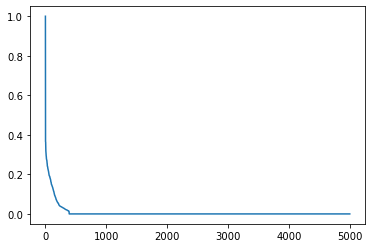

In [105]:
import matplotlib.pyplot as plt
import numpy as np

tweets['cosine_similarity'].plot()